# Data Analysis and Visualization Assignment 3
20.11.2023

| Name | Uni-ID |
| --- | --- |
|  |  |
|  |  |
|  |  |
|  |  |

**Group name:**

In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## 1. (6.5 points) From literature the mean grain yield for rice variety R1 is known to be 3.5 t/ha. On 15 fields of size 1 ha you have investigated fertilization and reached grain yields [t] for rice variety R1 as given in data set ricevarR1.txt. Is the mean yield from your fields significantly larger than the mean value from the literature? Use significance level 0.01.

### 1 a. (0.5 points) Read the dataset in file `ricevarR1.txt`.

In [3]:
ricevar <- read.table("ricevarR1.txt", header=T)

### 1 b. (1 point) Describe the data by statistical parameters, and visualize them in a suitable way.

In [4]:
summary(ricevar)

     ryield     
 Min.   :3.800  
 1st Qu.:4.320  
 Median :4.450  
 Mean   :4.578  
 3rd Qu.:4.980  
 Max.   :5.550  

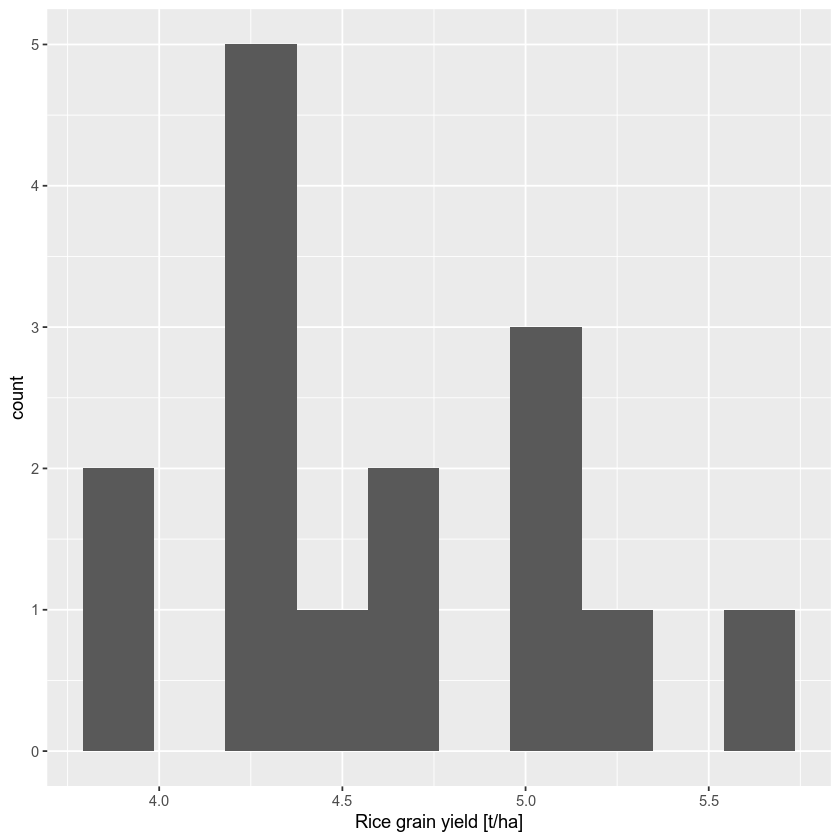

In [6]:
ricevar %>%
ggplot(mapping=aes(x=ryield)) +
geom_histogram(bins=10) +
xlab("Rice grain yield [t/ha]")

### 1 c. (1 point) Compute the 95% CI for the meanyield and interpret your result.

In [5]:
am <- mean(ricevar$ryield)
s <- sd(ricevar$ryield)
l <- length(ricevar$ryield)
error <- qt(0.975, df=l-1)*s/sqrt(l)
am-error
am+error

[1] 4.304106

[1] 4.851894

The reference value of 3.5 t/ha is not within the limits of the confidence intervall.<br/>
It is thus likely that the measured yield is larger than the reference.

### 1 d. (1 point) Formulate the statistical hypotheses to answer the given question above.

* $\mu_{fert}$: Mean yield of the fertilized rice 
* mu = 3.5 t/ha: Reference value for variety R1
* Null-hypothesis: $H_0: \mu_{fert}\le mu$
* Alternative hypothesis: $H_1: \mu_{fert}>mu$

### 1 e. (1 point) Give the right testing procedure and its assumptions.

* One sided t-test for one sample and one reference value
* Assumption: The sample is taken from a normal-distributed population.

### 1 f. (1 point) Run the test procedure.

In [6]:
t.test(ricevar$ryield, mu=3.5, alternative="greater")


	One Sample t-test

data:  ricevar$ryield
t = 8.4415, df = 14, p-value = 3.644e-07
alternative hypothesis: true mean is greater than 3.5
95 percent confidence interval:
 4.353077      Inf
sample estimates:
mean of x 
    4.578 


### 1 g. (1 point) Interpret the results with respect to the given question above.

$p=3.644*10^{-7}<\alpha=0.01$<br/>
The result is significant. The alternative hypothesis can be accepted. That is, the mean yield of the fertilized rice is greater than the reference value of variety R1 on significance level 0.01. 

## 2. (6 points) Formulate the statistical hypotheses for the following problems and decide on the appropriate test procedure. Normal distribution of parameters is always assumed:

### 2 a. (2 points) The carrot variety MK is known to consist of 4.7% sugar with a standard deviation of 0.9%. On a test field a new variety MK-100 showed an average sugar content of 5.3%. Is the mean ratio of sugar in the new variety larger than in the variety MK?

$H_0: \mu_{MK\mbox{-}100}\le\mu_{MK}$;<br/>
$H_1: \mu_{MK\mbox{-}100}>\mu_{MK}$;<br/>
where $\mu_{MK\mbox{-}100}$: mean sugar content of variety MK-100;<br/>
and $\mu_{MK}$: mean sugar content of variety MK<br/>
Test procedure: One sided z-test for one sample with known variance and a reference value

Strictly speaking, the variance is only known for variety MK. Variety MK-100 could have a different variance. Consequently, it could be argued that a t-test is more appropriate:

Test procedure: One sided t-test for one sample and a reference value

### 2 b. (2 points) For cucumber hybrid CA a mean weight of 105g has been measured, while for hybrid CB a mean weight of 109g has been measured. The cultivating parameters have been the same for all included plants. Does the mean cucumber weight differ between CA and CB?

$H_0:\mu_{CA}=\mu_{CB}$;<br/>
$H_1:\mu_{CA}\neq\mu_{CB}$;<br/>
where $\mu_{CA}$: mean weight of cummmcumber hybrid CA;<br/>
and $\mu_{CB}$: mean weight of cucumber hybrid CB<br/>
Test procedure: Two sided t-test for two samples

### 2 c. (2 points) In 40 plots the infestation of cabbage has been quantified before and after the use of pesticide. Is the mean infestation more than 10% smaller after the use of pesticide?

$H_0:\mu_{after}\ge\mu_{before}*0.9$ ;<br/>
$H_1:\mu_{after}<\mu_{before}*0.9$ ;<br/>
where $\mu_{after}$: mean infestation of cabbage after use of pesticide;<br/>
and $\mu_{before}$: mean infestation of cabbage before the use of pesticite<br/>
Test procedure: One sided t-test for two paired samples.

## 3. (7.5 points) Take another look at the data table from the long term fertilization experiment in Rengen (`SupplementTableS7_CSH.xlsx`).

In [8]:
library(readxl)
cmprSwrdHght <- read_excel("./SupplementTableS7_CSH.xlsx", skip=1)
cmprSwrdHght <- cmprSwrdHght %>% rename(CSH = `CSH [cm]`) %>% select(-c(`T∑`)) %>% rename(MeasurementNo = `Measuerment no.`)

### 3 a. (0.5 point) Visualize the influence of the fertilization regimes on the compressed sward height.

The naive approach is to just divide the CSH data by fertilization. This is sufficient to get 0.5 points but it is problematic because the boxes are plotted from multiple samples pooled together.

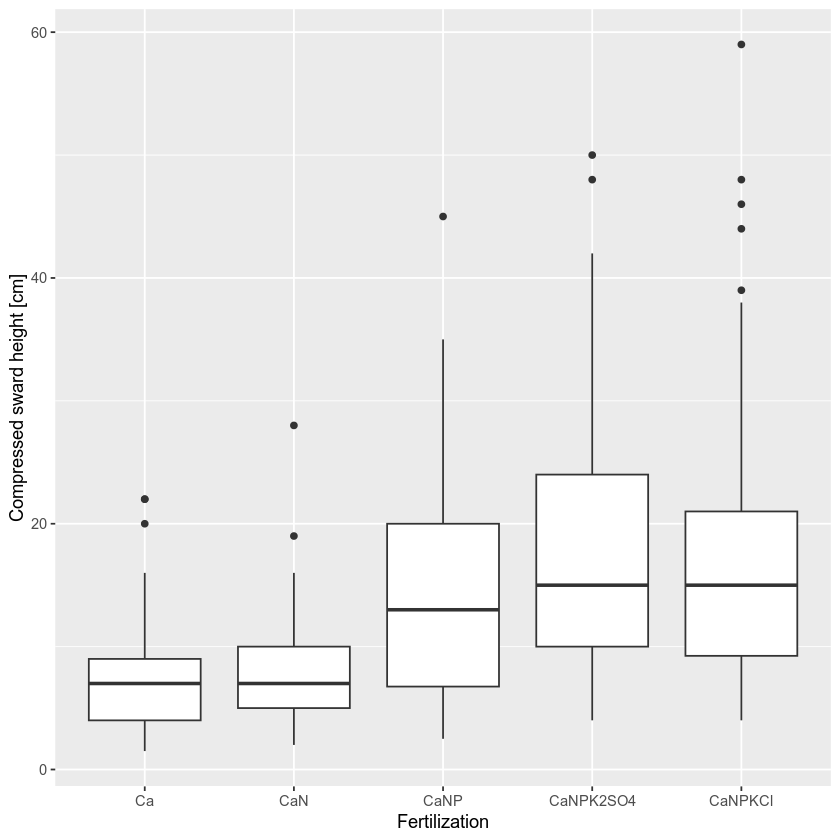

In [9]:
ggplot(data = cmprSwrdHght) +
aes(y=CSH, x=Fertilization) +
geom_boxplot() +
ylab("Compressed sward height [cm]")

A better approach is to also split up the data by Date because this shows individual samples:

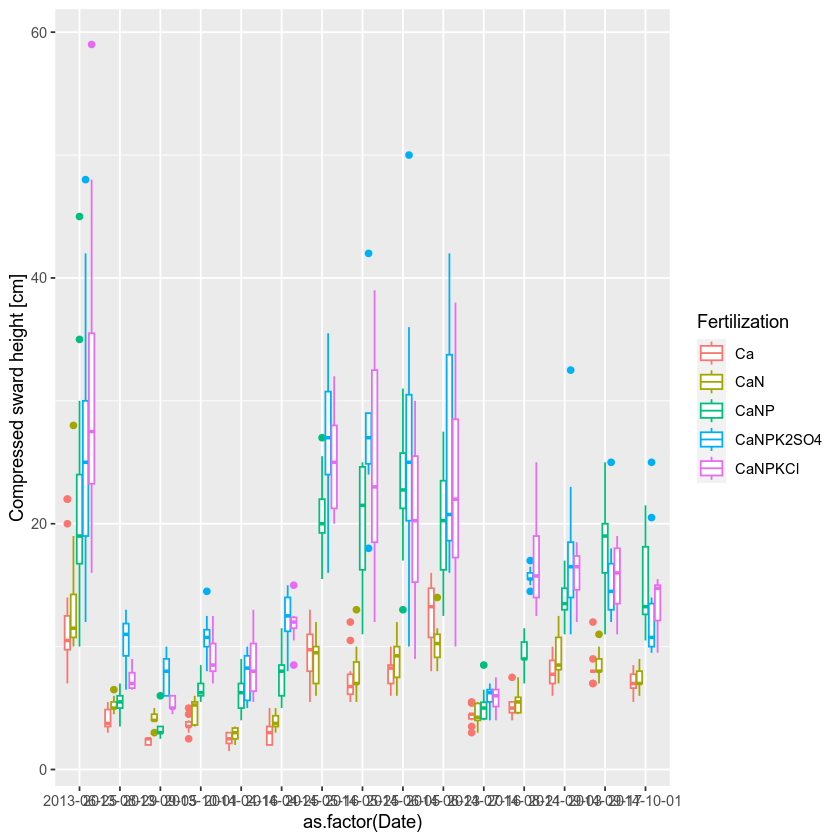

In [11]:
ggplot(data=cmprSwrdHght, mapping=aes(y=CSH, x=as.factor(Date), color=Fertilization)) +
geom_boxplot() +
ylab("Compressed sward height [cm]")

### 3 b. (2 points) Calculate an interpret the 95% confidence intervalls for the compressed sward height of each fertilization. 

In [10]:
convInterv <- function(x, conv=0.95) {
    am <- mean(x)
    s <- sd(x)
    error <- qt(conv+(1-conv)/2, df=length(x)-1)*s/sqrt(length(x))
    interv <- c(am-error, am+error)
    names(interv) <- c("lower", "upper")
    return(interv)
}

Again: Calulating confidence intervalls of pooled samples is problematic but will give full points:

In [11]:
cmprSwrdHght %>%
group_by(Fertilization) %>%
summarise(cshLowerCI=convInterv(CSH)[1], cshUpperCI=convInterv(CSH)[2])

Fertilization,cshLowerCI,cshUpperCI
<chr>,<dbl>,<dbl>
Ca,6.400403,7.630564
CaN,6.945200,8.106413
CaNP,12.649528,15.149181
CaNPK2SO4,15.949234,18.960444
CaNPKCl,15.313832,18.441007


* The CIs for Ca and CaN overlap. $\rightarrow$ It is likely than the CSH of the Ca and CaN plots are not different from each other.
* The CIs for CaNP-K$_{2}$SO$_{4}$ and CaNP-KCl overlap. $\rightarrow$ It is likely than the CSH of the CaNP-K$_{2}$SO$_{4}$ and CaNP-KCl plots are not different from each other.
* The CIs for Ca and CaN do not overlap with the CIs for CaNP-K$_{2}$SO$_{4}$ and CaNP-KCl. $\rightarrow$ It is likely that the CSH from these pair of plots are different from each other.
* The CI for CaNP is between the others and doesn't overlap with any of them. $\rightarrow$ It is likely that the CSH of the CaNP plot is different from the CSH of all other plots.

If broken down by Date the number of CIs become overwhelming fast:

In [12]:
cmprSwrdHght %>%
group_by(Fertilization, Date) %>%
summarise(cshLowerCI=convInterv(CSH)[1], cshUpperCI=convInterv(CSH)[2])

`summarise()` has grouped output by 'Fertilization'. You can override using the
`.groups` argument.


Fertilization,Date,cshLowerCI,cshUpperCI
<chr>,<dttm>,<dbl>,<dbl>
Ca,2013-06-25,9.882050,14.017950
Ca,2013-08-29,3.496758,4.703242
Ca,2013-09-05,1.959956,2.640044
Ca,2013-10-01,3.142763,4.157237
Ca,2014-04-16,2.122974,2.877026
Ca,2014-04-25,2.245657,3.654343
Ca,2014-05-16,7.924035,11.275965
Ca,2014-05-25,5.982499,9.017501
Ca,2014-06-05,7.099390,8.800610


Unsing base R tapply function makes it a bit easer to see what's going on:

In [28]:
tapply(cmprSwrdHght$CSH, cmprSwrdHght[,c("Date", "Fertilization")], FUN=convInterv)

Fertilization
Date         Ca                  CaN                 CaNP               
  2013-06-25 9.88205, 14.01795   11.18785, 15.21215  17.46008, 25.23992 
  2013-08-29 3.496758, 4.703242  4.796, 5.704        4.612746, 6.187254 
  2013-09-05 1.959956, 2.640044  3.179157, 5.020843  1.877261, 5.322739 
  2013-10-01 3.142763, 4.157237  4.042187, 5.557813  5.953776, 7.346224 
  2014-04-16 2.122974, 2.877026  2.435271, 3.264729  5.022998, 7.177002 
  2014-04-25 2.245657, 3.654343  3.459866, 4.440134  6.211567, 9.288433 
  2014-05-16 7.924035, 11.275965 7.384373, 10.415627 18.18662, 23.21338 
  2014-05-25 5.982499, 9.017501  6.364247, 9.535753  16.69214, 23.80786 
  2014-06-05 7.09939, 8.80061    7.491314, 10.308686 19.0139, 26.2861   
  2014-06-23 10.71067, 14.68933  9.121913, 11.578087 16.32506, 23.37494 
  2014-07-16 3.846821, 4.933179  3.809055, 5.090945  4.240091, 6.239909 
  2014-08-21 4.43365, 5.86635    4.804798, 6.195202  8.504423, 10.395577
  2014-09-03 6.941218, 8.758782  8.065342, 10.634658 12.59898, 15.10102 
  2014-09-17 7.285526, 9.314474  7.760323, 9.439677  15.09418, 21.10582 
  2014-10-01 6.387248, 7.712752  6.63365, 8.06635    12.00799, 17.89201 
            Fertilization
Date         CaNPK2SO4           CaNPKCl            
  2013-06-25 21.63992, 29.96008  25.30028, 35.99972 
  2013-08-29 8.841424, 11.858576 6.717989, 7.982011 
  2013-09-05 5.578844, 10.021156 4.467066, 6.132934 
  2013-10-01 9.307553, 12.092447 7.851821, 10.348179
  2014-04-16 6.247593, 9.152407  6.646175, 10.253825
  2014-04-25 10.57884, 14.02116  10.6294, 12.9706   
  2014-05-16 21.9396, 30.8604    21.98379, 28.01621 
  2014-05-25 23.21027, 31.88973  18.88524, 31.81476 
  2014-06-05 18.25162, 34.24838  15.35109, 24.94891 
  2014-06-23 18.92581, 32.17419  16.63202, 28.56798 
  2014-07-16 5.25134, 6.54866    5.13365, 6.56635   
  2014-08-21 15.18858, 16.21142  14.01483, 19.78517 
  2014-09-03 13.44331, 22.25669  14.18978, 17.41022 
  2014-09-17 12.85624, 18.34376  13.81067, 17.78933 
  2014-10-01 9.387745, 17.012255 11.87397, 15.12603

It is at this point, that it makes sense to narrow down the view and focus on a subset of the date to answer a specific question.</br>
So from now on, we choose to only consider the CSH measurements made on the last date of the first growth in 2014 (2014-06-23). With the exception of measurements taken just after mowing, any other date would be suitable too.

Interpretation CSH CIs (2014-06-23): </br>
* The CIs for Ca and CaN overlap. This indicates that there is no difference of CSH when N is added to Ca.</br>
* The CIs for Ca and CaNP do not overlap. This indicates that there is a difference of CSH when P is added to CaN.</br>
* The CIs for CaNP and CaNPK$_2$SO$_4$ overlap. This indicates that there is no difference of CSH when K$_2$SO$_4$ is added to CaNP.</br>
* The CIs for CaNPK$_2$SO$_4$ and CaNPKcl overlap. This indicates that there is no difference of CSH when Cl is added to CaNPK$_2$SO$_4$.

### 3 c. (2 points) Are the assumptions to perform t-tests between the CSH of the fertilizations fulfilled? First, visualize the distribution of the CSH within the fertilizations and then perform tests.

The CSH measurements from one fertilization at one specific date can be considered to come from the same population. Consequently it is at this level that normal distribution of the data can be expected. In contrast, when looking at the pooled date from all dates, normal distribution can not be expected. So this step should also be performed with a subset of the data selected to examine a more specific question.</br>
Nonetheless, if correctly performed and interpreted, testing the pooled date will yield full points for this task.

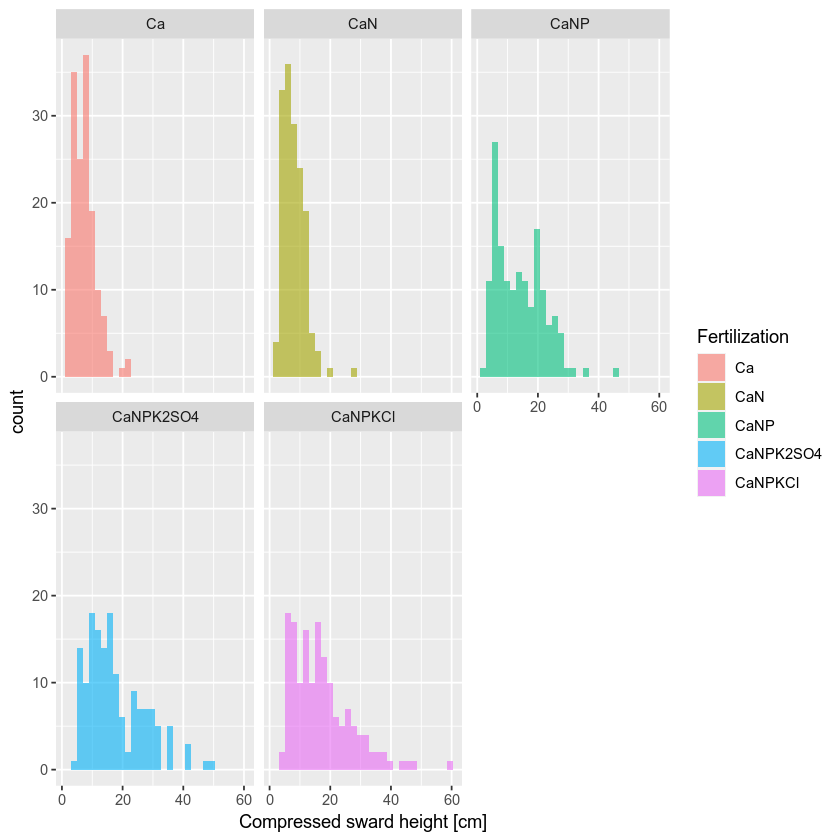

In [12]:
cmprSwrdHght %>%
ggplot( aes(x=CSH, fill=Fertilization)) +
geom_histogram(alpha=0.6, bins=30) +
facet_wrap(~Fertilization) +
xlab("Compressed sward height [cm]")

In [14]:
library(car)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




[1]  8 17

[1] 12  5

[1] 18 17

[1] 94 18

[1]  9 14

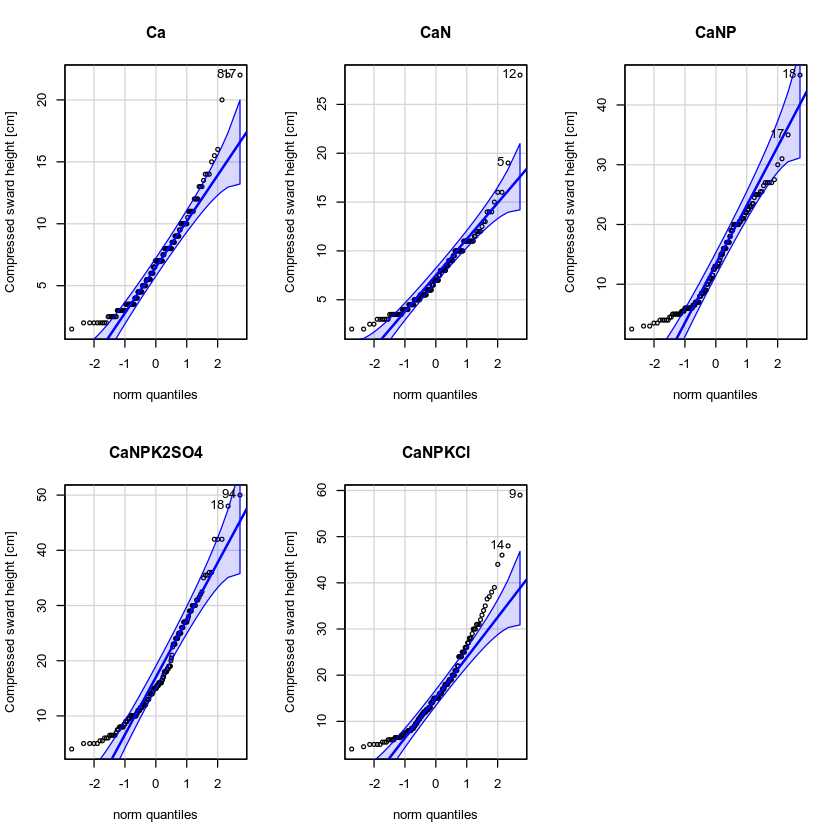

In [17]:
par(mfrow=c(2,3))
qqPlot(cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="Ca"], main="Ca", ylab="Compressed sward height [cm]")
qqPlot(cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="CaN"], main="CaN", ylab="Compressed sward height [cm]")
qqPlot(cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="CaNP"], main="CaNP", ylab="Compressed sward height [cm]")
qqPlot(cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="CaNPK2SO4"], main="CaNPK2SO4", ylab="Compressed sward height [cm]")
qqPlot(cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="CaNPKCl"], main="CaNPKCl", ylab="Compressed sward height [cm]")

In [17]:
shapval<-function(x) {
    st<-shapiro.test(x)
    return(st$p.value)
}

In [18]:
cmprSwrdHght %>%
group_by(Fertilization) %>%
summarise(shapiroPval=shapval(CSH))

Fertilization,shapiroPval
<chr>,<dbl>
Ca,7.305141e-08
CaN,9.499037e-09
CaNP,2.412139e-06
CaNPK2SO4,1.710398e-07
CaNPKCl,1.383985e-08


* Histograms: Distributions are not symetric (very short left tail, long right tail) and some have multiple peaks.
* qqPlots: Many data points outside of the 95% CI-band; Especially in lower quantiles.
* Shapiro-Wilk tests: The p-values are all much smaller than 0.05 $\rightarrow$ Accept alternative hypothesis (non normal distribution); Reject null-hypotheis (normal distribution).  
  
In the case of all five fertilizations normal distibution of the data can not be assumend. 

The data should be broken down to the level of fertilizations in each date:

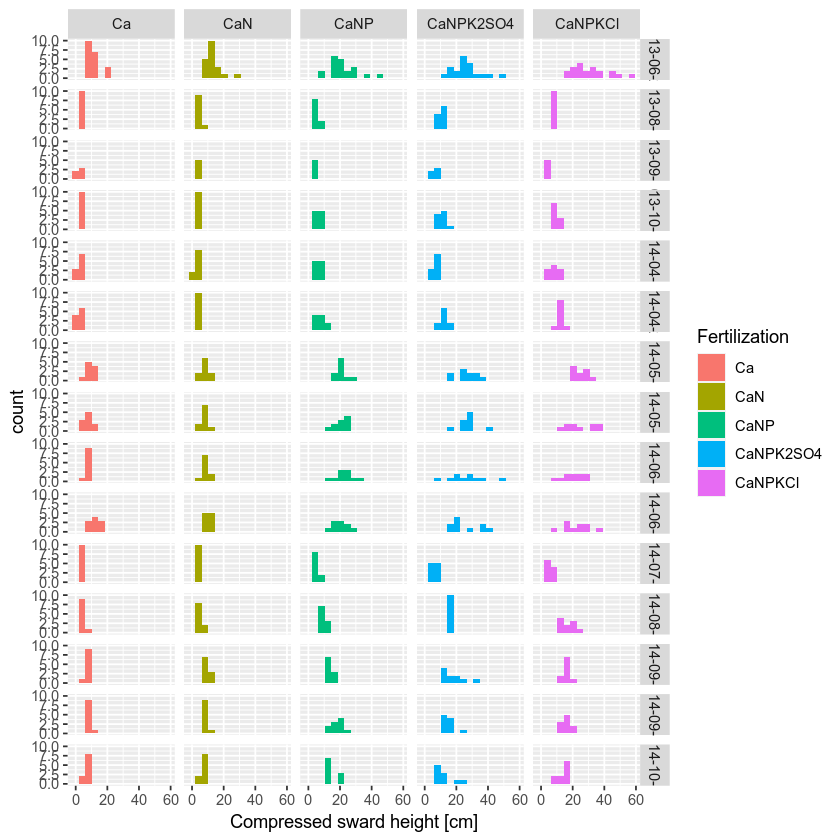

In [18]:
cmprSwrdHght %>%
ggplot(aes(x=CSH, fill=Fertilization)) +
geom_histogram(bins=15) +
xlab("Compressed sward height [cm]") +
facet_grid(rows=vars(Date), cols=vars(Fertilization))

---

Let's focus on date (2014-06-23) again:

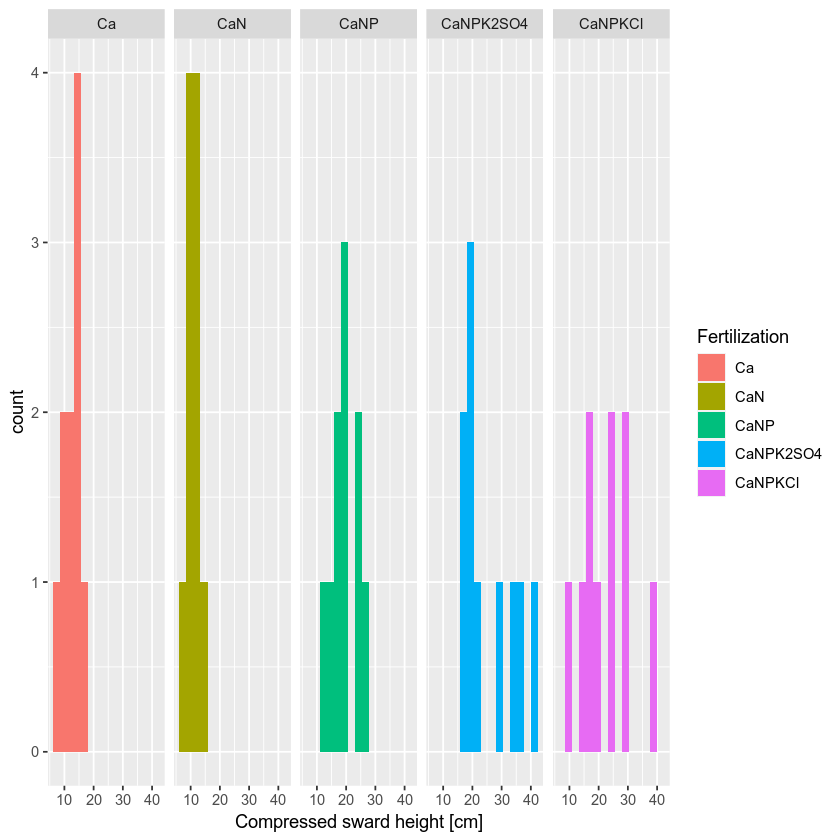

In [19]:
cmprSwrdHght %>%
filter(Date==as.Date("2014-06-23")) %>%
ggplot(aes(x=CSH, fill=Fertilization)) +
geom_histogram(bins=15) +
xlab("Compressed sward height [cm]") +
facet_grid(cols=vars(Fertilization))

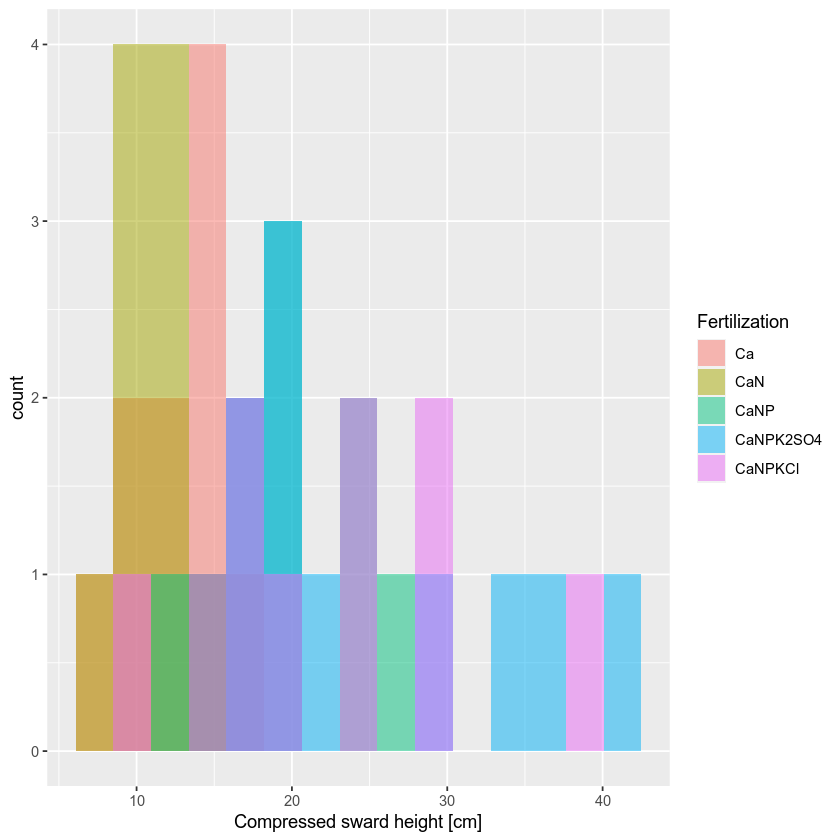

In [20]:
cmprSwrdHght %>%
filter(Date==as.Date("2014-06-23")) %>%
ggplot(aes(x=CSH, fill=Fertilization)) +
geom_histogram(bins=15, alpha=0.5, position="identity") +
xlab("Compressed sward height [cm]")

The qqPlots for all samples don't fit in the plotting device used in Jupyter. So here you can see how it can be plotted to PDF instead:

In [38]:
pdf("CSHqq.pdf", 10, 30)
par(mfrow=c(15,5))
for(fert in unique(cmprSwrdHght$Fertilization)) {
    for(date in unique(cmprSwrdHght$Date)) {
        qqPlot(cmprSwrdHght$CSH[cmprSwrdHght$Fertilization==fert & cmprSwrdHght$Date==date], main=fert, ylab="CSH")
    }
}
dev.off()

png 
  2

Let's focus on one date (2014-06-23) again:

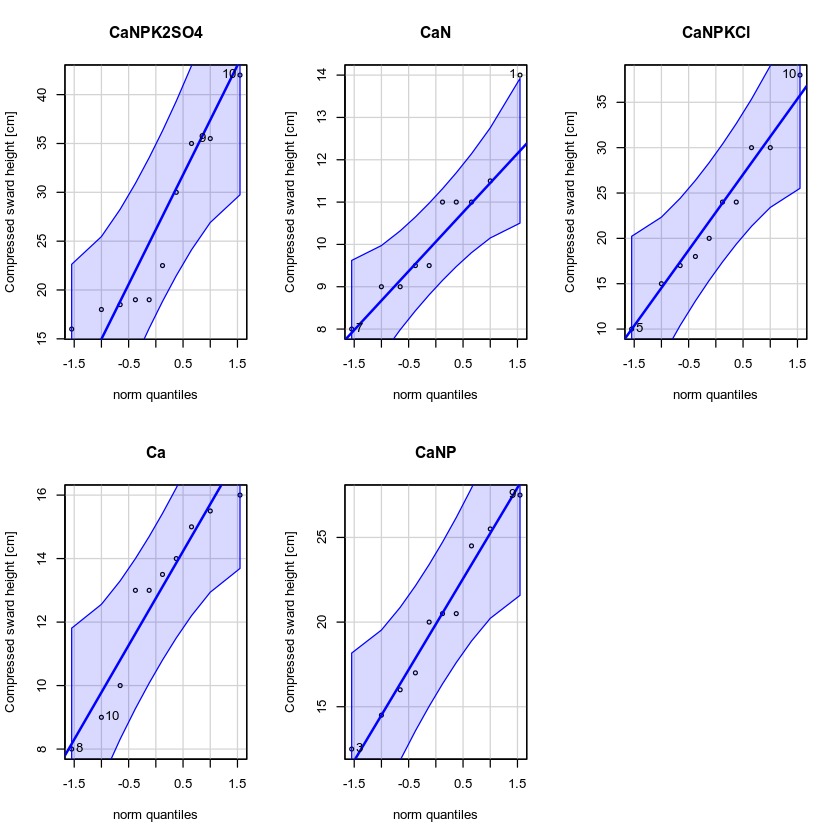

In [21]:
par(mfrow=c(2,3))
for(fert in unique(cmprSwrdHght$Fertilization)) {
    qqPlot(cmprSwrdHght$CSH[cmprSwrdHght$Fertilization==fert & cmprSwrdHght$Date==as.Date("2014-06-23")], main=fert, ylab="Compressed sward height [cm]")
}

In [29]:
tapply(cmprSwrdHght$CSH, cmprSwrdHght[,c("Date", "Fertilization")], FUN=shapval)

,Ca,CaN,CaNP,CaNPK2SO4,CaNPKCl
2013-06-25,0.0005040278,7.796113e-05,0.03216638,0.287994557,0.13359900
2013-08-29,0.1884334559,2.375072e-01,0.59773680,0.379332050,0.10569087
2013-09-05,0.0064700008,7.772534e-01,0.05254258,0.377222469,0.20062380
2013-10-01,0.3179865443,3.056184e-02,0.12461628,0.599124728,0.37607774
2014-04-16,0.0739125936,1.239836e-01,0.58341357,0.060661975,0.51956452
2014-04-25,0.0552110550,1.599019e-01,0.43338184,0.346541570,0.23133572
2014-05-16,0.8343054836,2.775094e-01,0.52531524,0.721504690,0.39661496
2014-05-25,0.0180131538,7.812021e-02,0.10619236,0.053114243,0.56671064
2014-06-05,0.6792748393,7.755508e-01,0.86775609,0.732878198,0.87600047
2014-06-23,0.2571211078,3.501455e-01,0.80422312,0.068347041,0.91350361


In some of the samples non-normal distribution must still be accepted. But most samples show normal distribution.

Interpretation of the distribution of the CSH on 2014-06-23:
* Histogram: The data points are grouped together and mostly just one peak can be observed
* qqPlots: All experimental quantiles are within the 95% interval expected for normal distributed data
* Shapiro-Wilk test: p-values are $\ge$ 0.05</br>
So for all five samples the alternative hypothesis of non-normality can be rejected.

### 3 d. (1.5 points) Formulate the statistical hypotheses to compare the CSH of the fertilizations.

These are the hypotheses formulated for the data pooled over all dates.

$\mu_{Ca}$: mean CSH of Ca (lime only) fertilization<br/>
$\mu_{CaN}$: mean CSH of CaN (lime/nitrogen) fertilization<br/>
$\mu_{CaNP}$: mean CSH of CaNP (lime/nitrogen/phosphorus) fertilization<br/>
$\mu_{CaNP\mbox{-}KCl}$: mean CSH of CaNP-KCl (lime/nitrogen/phosphorus/potasium) fertilization<br/>
$\mu_{CaNP\mbox{-}K_{2}SO_{4}}$: mean CSH of CaNP-K$_{2}$SO$_{4}$ (lime/nitrogen/phosphorus/potasium/sulfur) fertilization<br/>

#### Influence of adding nitrogen to lime only:
$H_{0\mbox{-}N}$: $\mu_{Ca}\ge\mu_{CaN}$<br/>
$H_{1\mbox{-}N}$: $\mu_{Ca}<\mu_{CaN}$<br/>

#### Influence of adding phosphorus to lime/nitrogen:
$H_{0\mbox{-}P}$: $\mu_{CaN}\ge\mu_{CaNP}$<br/>
$H_{1\mbox{-}P}$: $\mu_{CaN}<\mu_{CaNP}$<br/>

#### Influence of adding potasium to lime/nitrogen/phosphorus:
$H_{0\mbox{-}K}$: $\mu_{CaNP}\ge\mu_{CaNP\mbox{-}KCl}$<br/>
$H_{1\mbox{-}K}$: $\mu_{CaNP}<\mu_{CaNP\mbox{-}KCl}$<br/>

#### Influence of adding sulfur to lime/nitrogen/phosphorus/potasium:
$H_{0\mbox{-}S}$: $\mu_{CaNP\mbox{-}KCl}\ge\mu_{CaNP\mbox{-}K_{2}SO_{4}}$<br/>
$H_{1\mbox{-}S}$: $\mu_{CaNP\mbox{-}KCl}<\mu_{CaNP\mbox{-}K_{2}SO_{4}}$<br/>

---

Formulations for a specific date (e.g. 2014-06-23) could be specified like this:

$\mu_{Ca(2014.06.23)}$: mean CSH of Ca (lime only) fertilization on 2014-06-23<br/>
$\mu_{CaN(2014.06.23)}$: mean CSH of CaN (lime/nitrogen) fertilization on 2014-06-23<br/>
$\mu_{CaNP(2014.06.23)}$: mean CSH of CaNP (lime/nitrogen/phosphorus) fertilization on 2014-06-23<br/>
$\mu_{CaNP\mbox{-}KCl(2014.06.23)}$: mean CSH of CaNP-KCl (lime/nitrogen/phosphorus/potasium) fertilization on 2014-06-23<br/>
$\mu_{CaNP\mbox{-}K_{2}SO_{4}(2014.06.23)}$: mean CSH of CaNP-K$_{2}$SO$_{4}$ (lime/nitrogen/phosphorus/potasium/sulfur) fertilization on 2014-06-23<br/>

#### Influence of adding nitrogen to lime only:
$H_{0\mbox{-}N(2014.06.23)}$: $\mu_{Ca(2014.06.23)}\ge\mu_{CaN(2014.06.23)}$<br/>
$H_{1\mbox{-}N(2014.06.23)}$: $\mu_{Ca(2014.06.23)}<\mu_{CaN(2014.06.23)}$<br/>

#### Influence of adding phosphorus to lime/nitrogen:
$H_{0\mbox{-}P(2014.06.23)}$: $\mu_{CaN(2014.06.23)}\ge\mu_{CaNP(2014.06.23)}$<br/>
$H_{1\mbox{-}P(2014.06.23)}$: $\mu_{CaN(2014.06.23)}<\mu_{CaNP(2014.06.23)}$<br/>

#### Influence of adding potasium to lime/nitrogen/phosphorus:
$H_{0\mbox{-}K(2014.06.23)}$: $\mu_{CaNP(2014.06.23)}\ge\mu_{CaNP\mbox{-}KCl(2014.06.23)}$<br/>
$H_{1\mbox{-}K(2014.06.23)}$: $\mu_{CaNP(2014.06.23)}<\mu_{CaNP\mbox{-}KCl(2014.06.23)}$<br/>

#### Influence of adding sulfur to lime/nitrogen/phosphorus/potasium:
$H_{0\mbox{-}S(2014.06.23)}$: $\mu_{CaNP\mbox{-}KCl(2014.06.23)}\ge\mu_{CaNP\mbox{-}K_{2}SO_{4}(2014.06.23)}$<br/>
$H_{1\mbox{-}S(2014.06.23)}$: $\mu_{CaNP\mbox{-}KCl(2014.06.23)}<\mu_{CaNP\mbox{-}K_{2}SO_{4}(2014.06.23)}$<br/>

### 3 e. (1.5 points) Perform the tests.

We quickly define two functions for t- and wilcoxon-test p-values so we can compare results easier:

In [23]:
# performs a t-test and return just the p-value
tPval <- function(x, y, alt="two.sided") {
    z<-t.test(x, y, alternative=alt)
    return(z$p.value)
}

In [24]:
# performs a Wilcoxon rank sum test and return just the p-value
wPval <- function(x, y, alt="two.sided") {
    z<-wilcox.test(x, y, alternative=alt)
    return(z$p.value)
}

In 3 c. we observed that the data pooled over all dates does not follow a normal distribution. It can be argued that we can still use t-tests because of the central limit theorem. It in effect states that for large enough samples the means can still be compared even if non normality is observed. Typically sample sizes of 50 and up are considered large enough. And our number of measurements per fertilization is 150. </br>
On the other hand non parametric wilcoxon rank sum tests can be used instead of t-tests. They are designed to also work on non normal distributed data but typically have a lover statistical power.</br>
Both of these two considerations are outside the scope of this course's syllabus. Consequently you will get full points for this task whichever test you choose and without stating a justification for it.

We choose a significance threshold of $\alpha=0.05$ for the interpretation of the tests.

In [28]:
tPval(cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="Ca"], cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="CaN"], alt="less")
wPval(cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="Ca"], cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="CaN"], alt="less")

[1] 0.1171124

[1] 0.05130269

Same result for both tests: There is no significant increase of the CSH if Nitrogen is added to the fertilization.

In [30]:
tPval(cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="CaN"], cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="CaNP"], alt="less")
wPval(cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="CaN"], cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="CaNP"], alt="less")

[1] 2.311126e-17

[1] 3.202942e-14

Same result for both tests: There is a significant increase of the CSH if Phosphorus is added to the fertilization.

In [31]:
tPval(cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="CaNP"], cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="CaNPK2SO4"], alt="less")
wPval(cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="CaNP"], cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="CaNPK2SO4"], alt="less")

[1] 0.0001936314

[1] 0.0005024858

Same result for both tests: There is a significant increase of the CSH if Phosphorus is added to the fertilization.

In [32]:
tPval(cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="CaNPK2SO4"], cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="CaNPKCl"], alt="less")
wPval(cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="CaNPK2SO4"], cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="CaNPKCl"], alt="less")

[1] 0.7001956

[1] 0.7471578

Same result for both tests: There is no significant increase of the CSH if Sulfur is added to the fertilization.

----

Let's focus on one date (2014-06-23) again:

We observed that these samples follow a normal distribution. So we just use t-tests here

In [52]:
tPval(cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="Ca" & cmprSwrdHght$Date==as.Date("2014-06-23")], 
      cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="CaN" & cmprSwrdHght$Date==as.Date("2014-06-23")], alt="less")

[1] 0.9809468

In [53]:
tPval(cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="CaN" & cmprSwrdHght$Date==as.Date("2014-06-23")], 
      cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="CaNP" & cmprSwrdHght$Date==as.Date("2014-06-23")], alt="less")

[1] 6.019161e-05

In [54]:
tPval(cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="CaNP" & cmprSwrdHght$Date==as.Date("2014-06-23")], 
      cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="CaNPK2SO4" & cmprSwrdHght$Date==as.Date("2014-06-23")], alt="less")

[1] 0.0540989

In [55]:
tPval(cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="CaNPK2SO4" & cmprSwrdHght$Date==as.Date("2014-06-23")], 
      cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="CaNPKCl" & cmprSwrdHght$Date==as.Date("2014-06-23")], alt="less")

[1] 0.7680237

All p-values are greater than our chosen significance threshold of $\alpha=0.05$. So at the 23rd of June 2014 the mean CSH of these fertilizations are were not significantly different form each other if only "neighbouring" fertilizations are compared.

So what happens if we do more extreme comparisons: The "lowest" fertilization ($Ca$) vs. "full" fertilization ($CaNP\mbox{-}K_{2}SO_{4}$)?

In [25]:
tPval(cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="Ca" & cmprSwrdHght$Date==as.Date("2014-06-23")], 
      cmprSwrdHght$CSH[cmprSwrdHght$Fertilization=="CaNPK2SO4" & cmprSwrdHght$Date==as.Date("2014-06-23")], alt="less")

[1] 0.0007995826

This yields a p-value smaller than our chosen significance threshold $\alpha=0.05$. So at the 23rd of June 2014 the mean CSH fertilized with just $Ca$ was significantly different from the mean CSH fertilized with $CaNP\mbox{-}K_{2}SO_{4}$

But one has to keep in mind that we just performed multiple tests using the same samples. With a certain amount of accepted false positives (5%) it is inevitable to observe significant test results if enough test are performed. Thus multiple testing correction must be applied (which is also outside of this lecture's scope). A very easy method for this is the Bonferroni correction: The significance threshold is simply divided by the number of performed tests.</br>
We performed a total of three tests that involved the samples of $Ca$ and $CaNP\mbox{-}K_{2}SO_{4}$:</br>
$\alpha_{adj}=\alpha/3=0.05/3=0.01666667$</br>
$0.0008<\alpha_{adj}$</br>

So the difference can still be considered to be significant but you can see how drastic the threshold adjustment can be.</br>
If confronted with many samples and the task to compare many of their combinations it is better to use tools that are designed to do just that: ANOVA followed by a Tukey test